In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
              
warnings.simplefilter(action='ignore', category = FutureWarning)

In [6]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
QUANDL_KEY ='VMuJREsX2yY4_McfSNj9'
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset = 'BCHAIN/MKPRU',
               start_date='2017-01-01',
               end_date='2021-08-31')

df = df.resample('M').last()

In [44]:
print(f'Shape of Dataframe: {df.shape}')
df.head()

Shape of Dataframe: (56, 1)


,Value
Date,
2017-01-31,964.706075
2017-02-28,1187.565286
2017-03-31,1034.740000
2017-04-30,1333.000000
2017-05-31,2285.933914


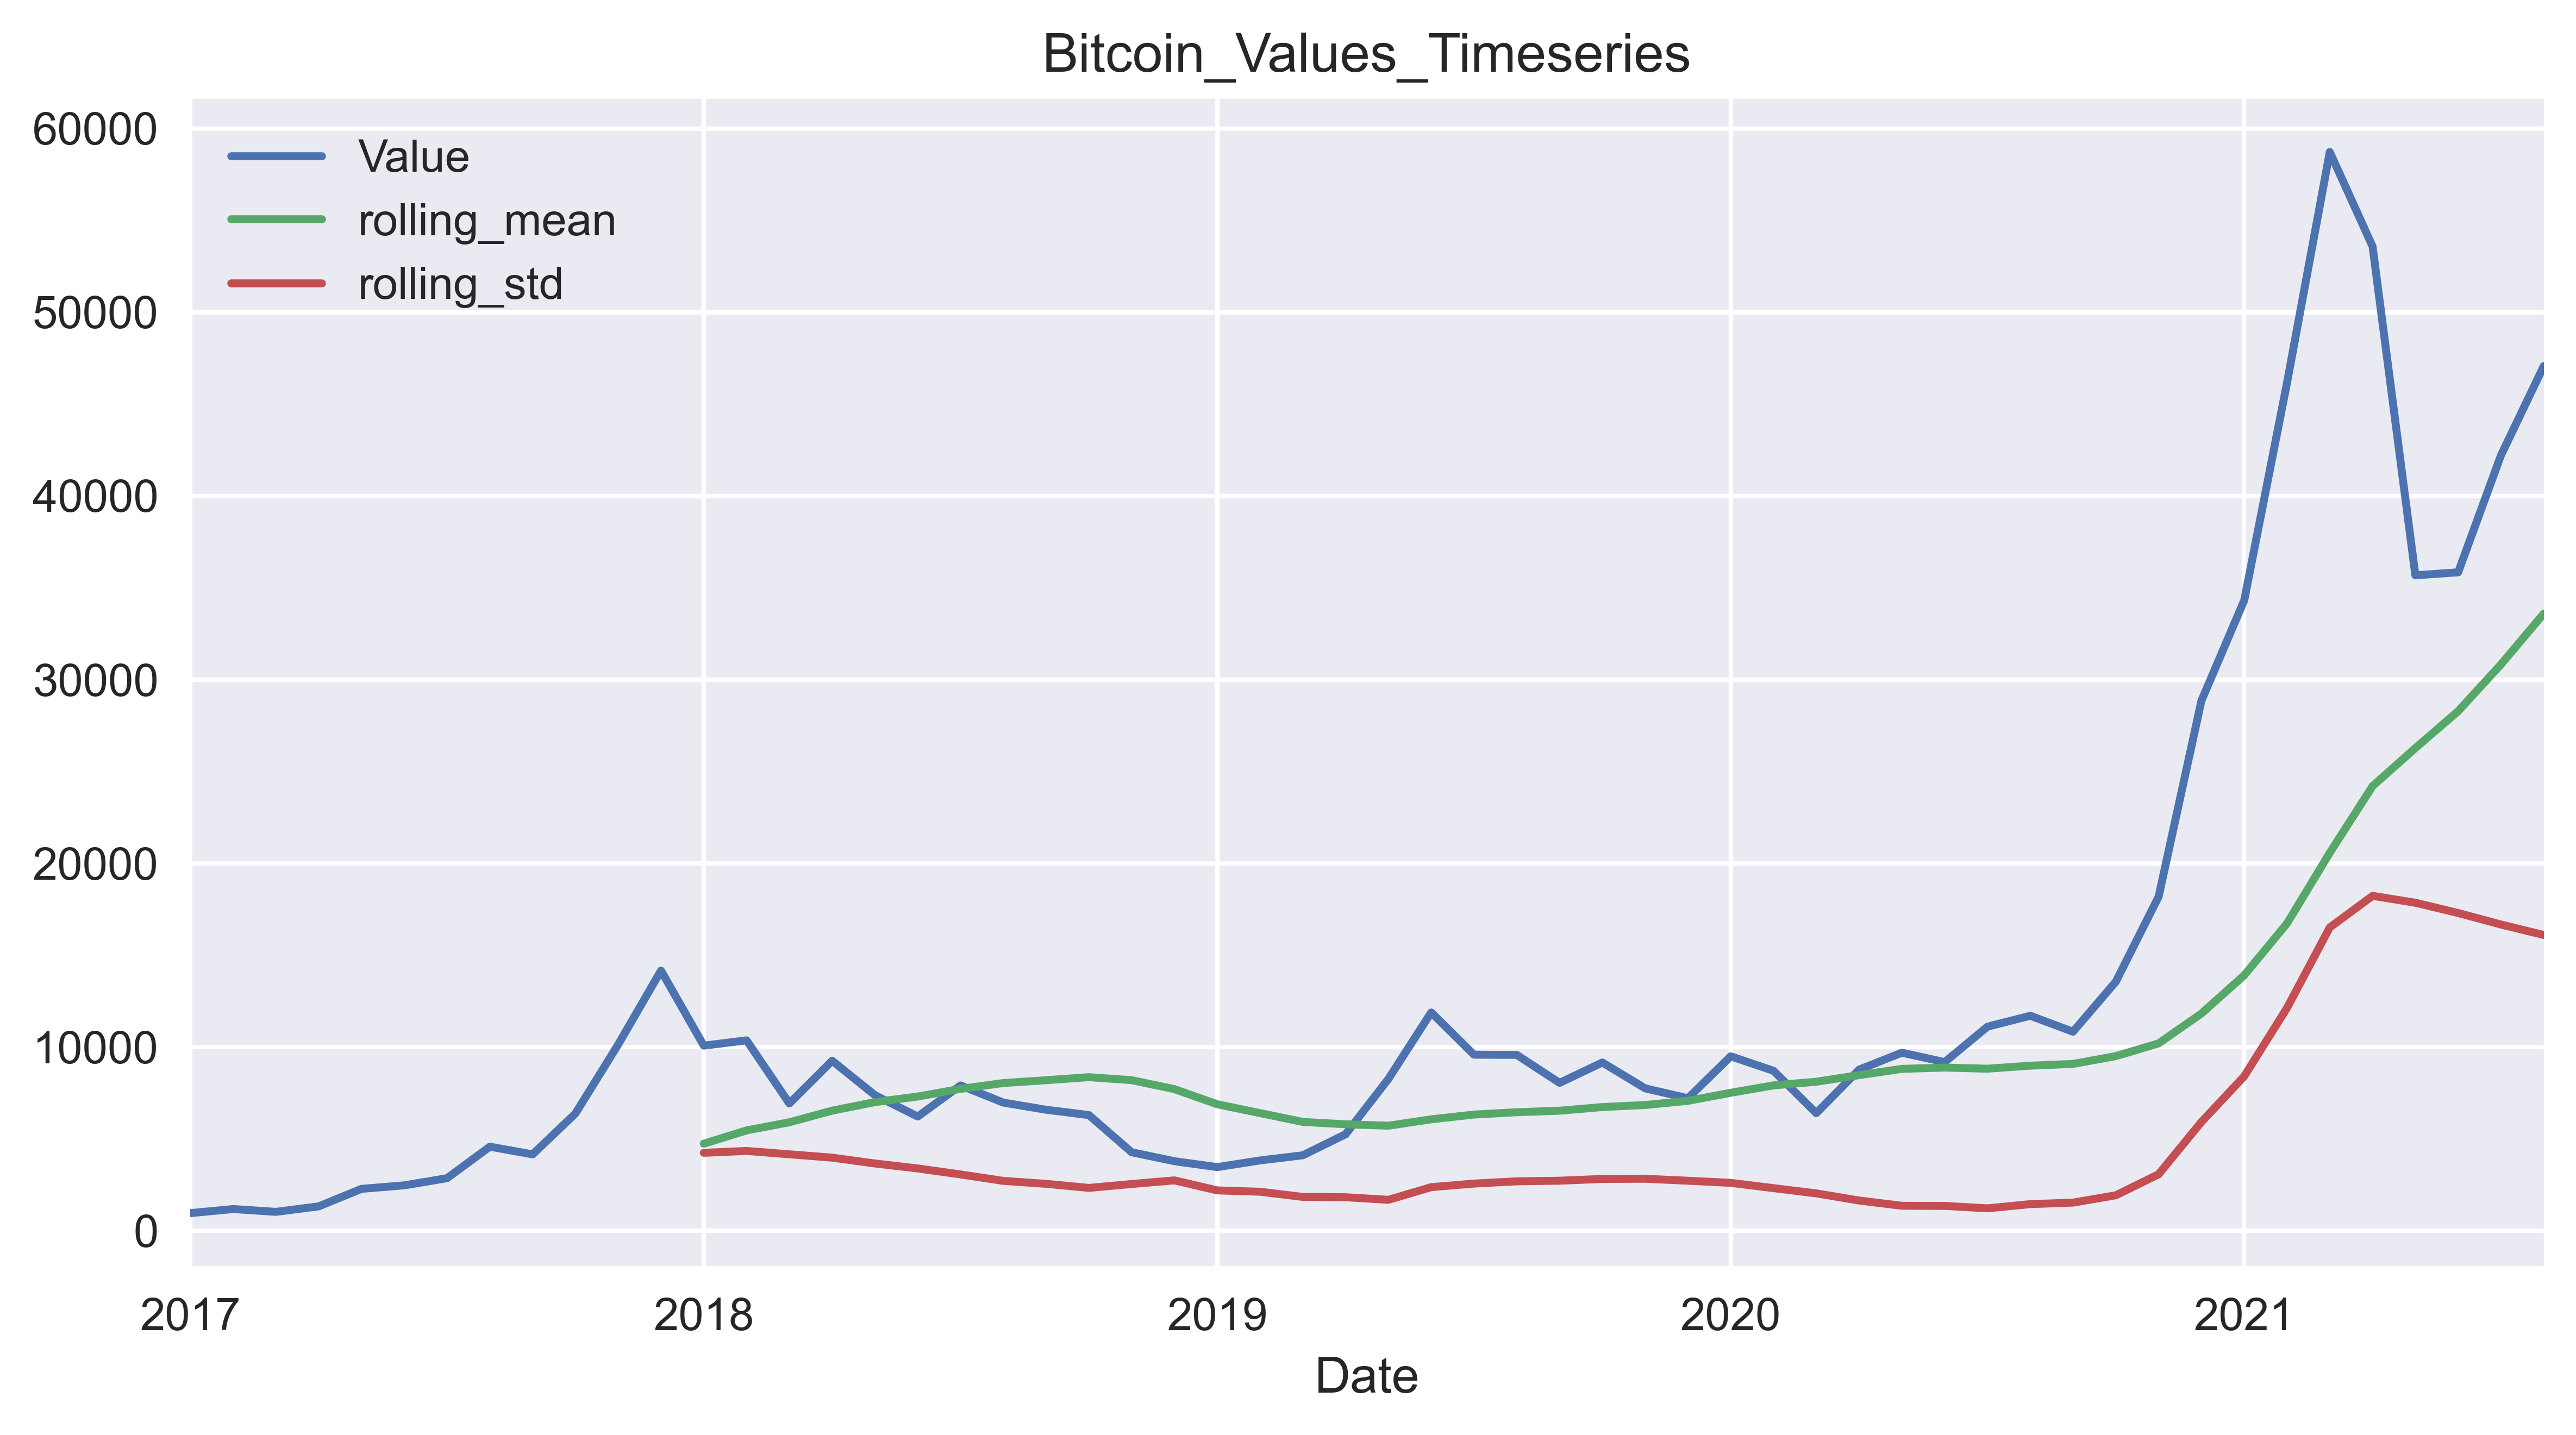

In [45]:
WINDOW_SIZE = 13
df['rolling_mean'] = df.Value.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.Value.rolling(window=WINDOW_SIZE).std()

df.plot(title='Bitcoin_Values_Timeseries')

plt.tight_layout()
plt.show()

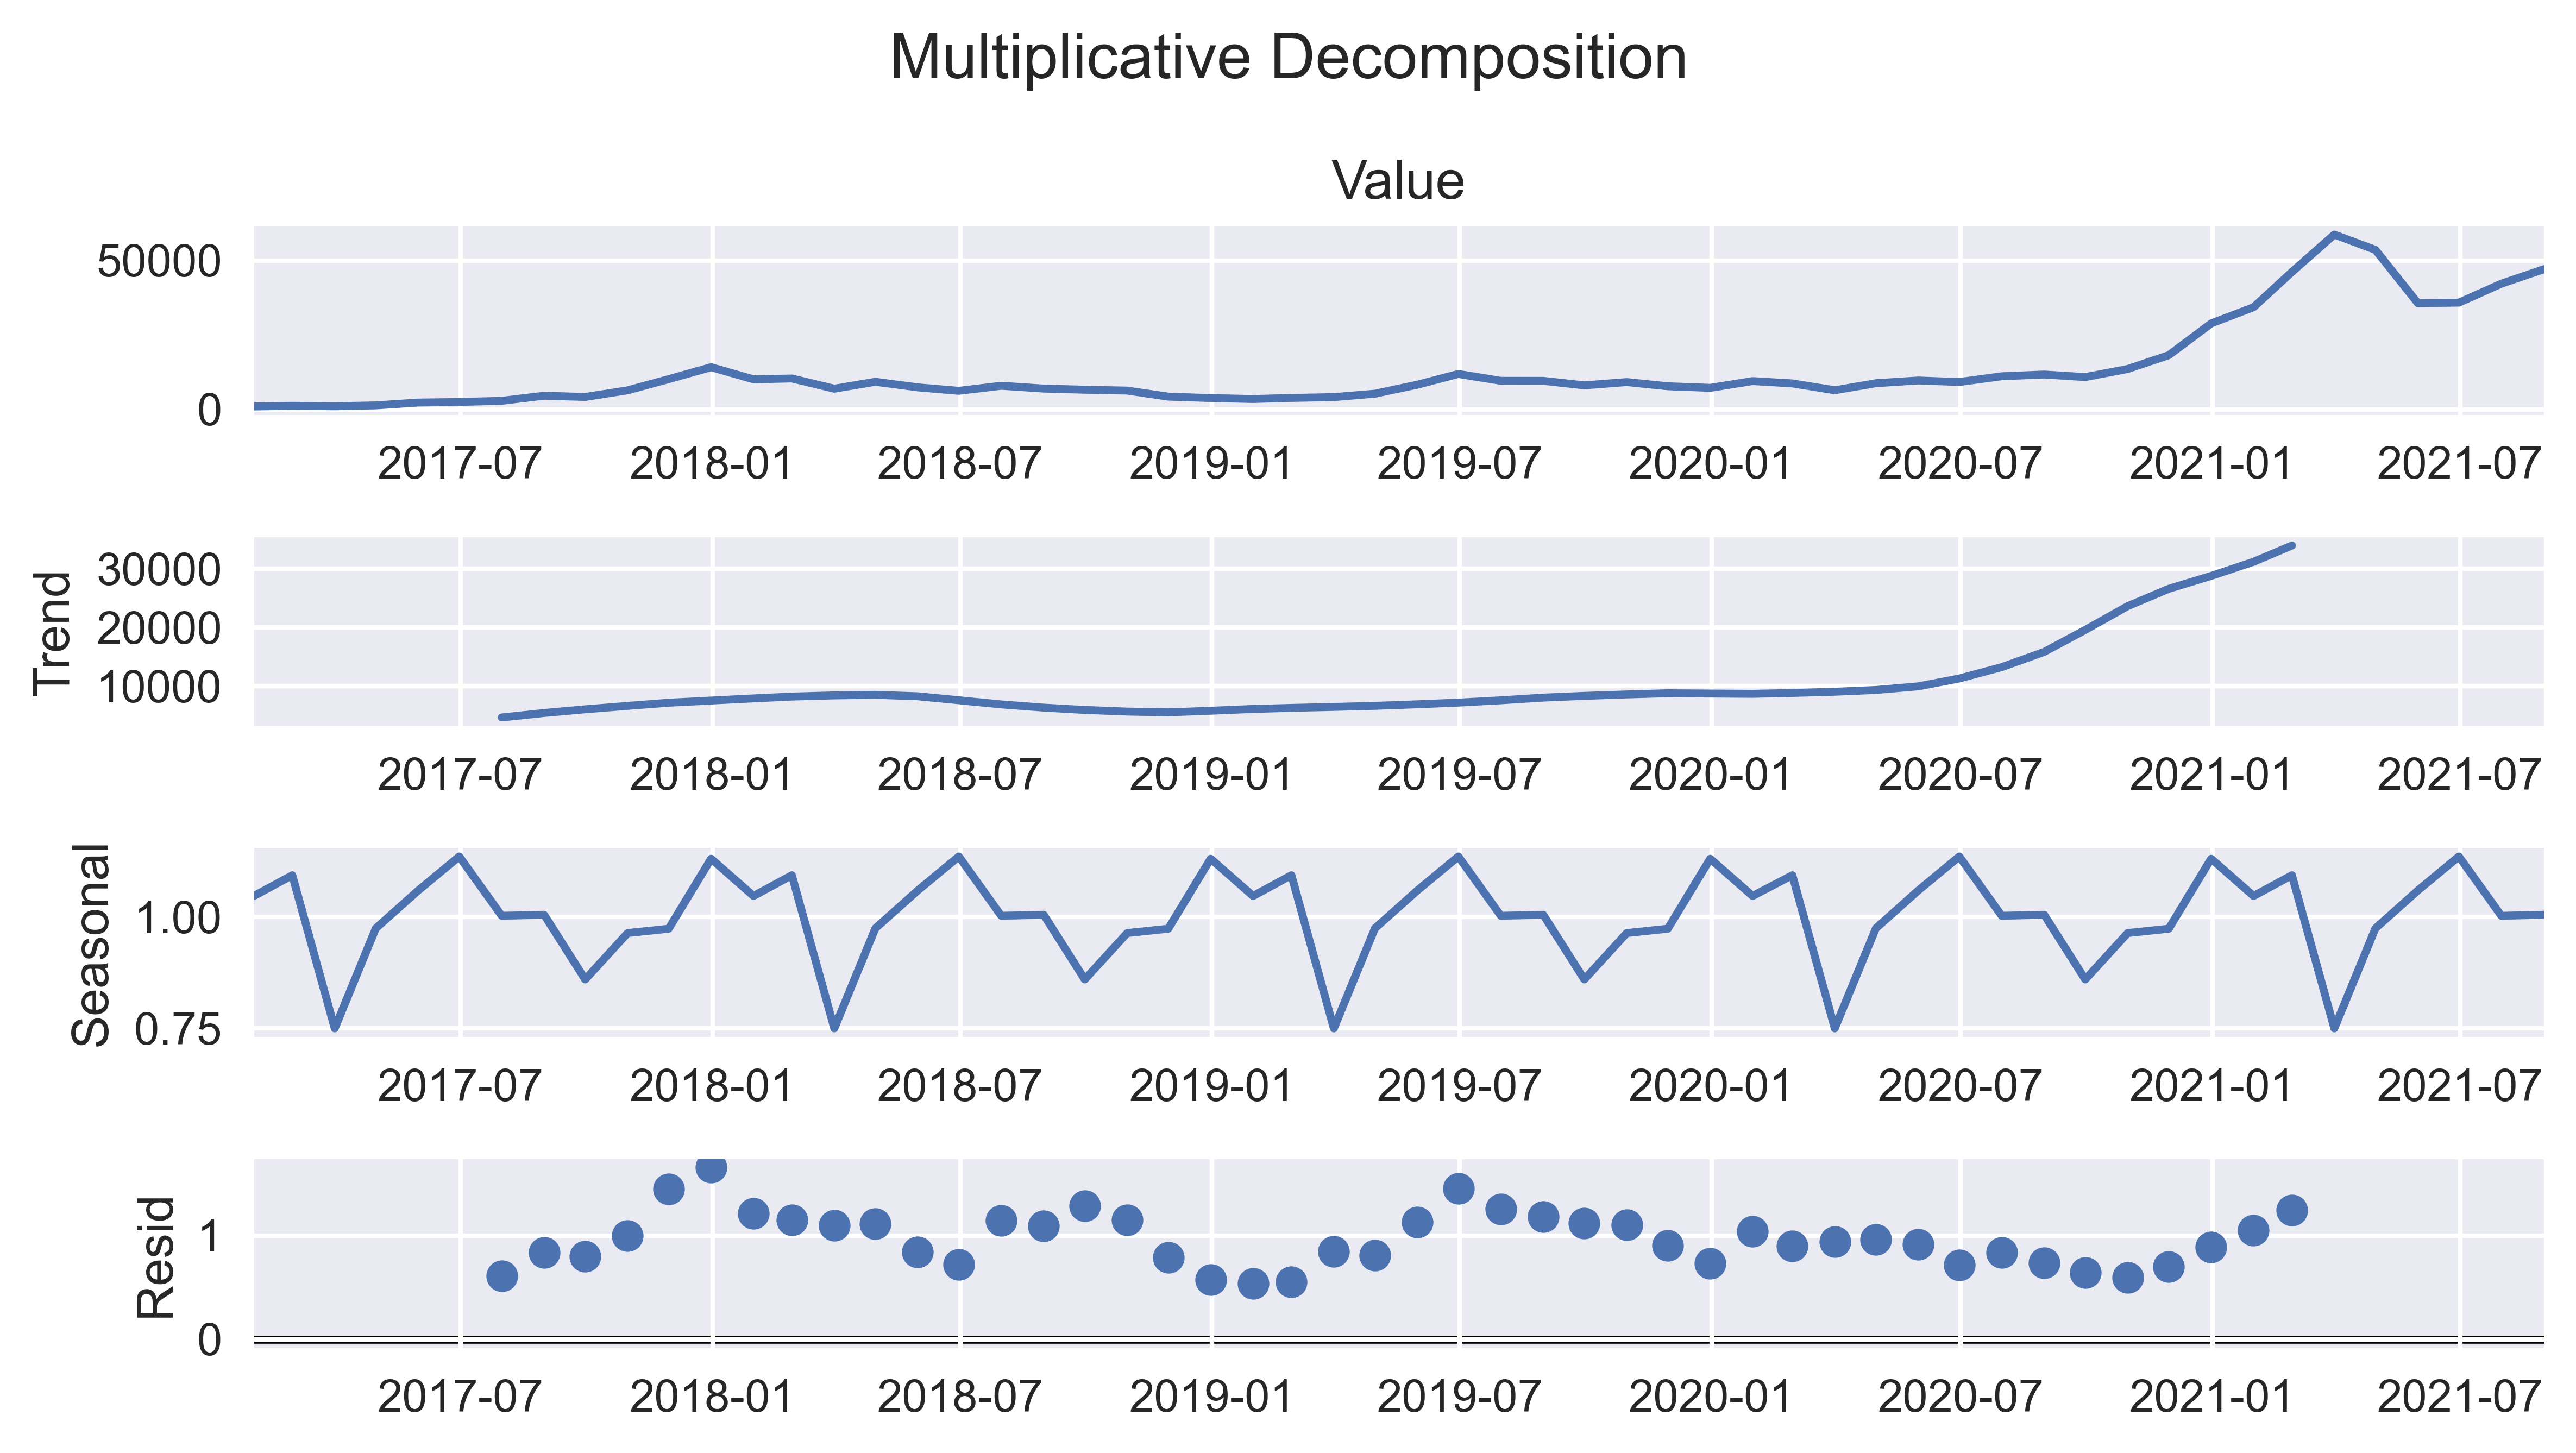

In [46]:
decomposition_results = seasonal_decompose(df.Value,
                                          model='multiplicative')
decomposition_results.plot() \
                     .suptitle('Multiplicative Decomposition',
                               fontsize = 14)
 
plt.tight_layout()
plt.show()